## Máster en Data Science

### Machine Learning

Contacto: angel.blanco@cunef.edu


# **Encoding, escalado y selección de variables**

En este notebook se realiza el encoding de las variables categóricas. Muchos algoritmos de aprendizaje automático no pueden manejar las variables categóricas por sí mismas a menos que las convirtamos en valores numéricos. Los resultados producidos por los modelos varían según las diferentes técnicas de codificación utilizadas.

Las variables categóricas pueden dividirse en dos categorías:

    - Nominal (Sin orden particular)
    - Ordinal (con algún orden)

A mayores, se llevarán acabo el escalado y la selección de variables.


#### Librerías

In [1]:
import os
from pathlib import Path

# Cambio del directory al root del proyecto
current_dir = Path.cwd()

if current_dir.name == "notebooks":
    os.chdir(current_dir.parent)


# Procesamiento
import pandas as pd 

# Modelado
from sklearn.preprocessing import StandardScaler

# Encoding y escalado
import category_encoders as ce
from sklearn.preprocessing import StandardScaler

# Gráficos
import matplotlib.pyplot as plt

# Selección de variables
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

from src.data import read_csv, write_csv
from src.const import variable_types
from src.models import write_model

#### Lectura de datos

In [2]:
pd_fraud_train = read_csv("data/preprocessed/train_pd_data_preprocessing_missing_outlier.csv")
pd_fraud_test = read_csv("data/preprocessed/test_pd_data_preprocessing_missing_outlier.csv")

#### Codificación de la variable objetivo

Siendo 1 indicador de alta probabilidad de fraude y 0 indicador de lo contrario.

In [3]:
pd_fraud_train['fraud_bool'].value_counts()

fraud_bool
0    791177
1      8823
Name: count, dtype: int64

In [4]:
x_train = pd_fraud_train.drop('fraud_bool',axis=1)
x_test = pd_fraud_test.drop('fraud_bool',axis=1)
y_train = pd_fraud_train['fraud_bool']
y_test = pd_fraud_test['fraud_bool']

#### Codificación del resto de variables categoricas

He elegido codificarlas con one-hot-encoding porque no hay muchas variables categoricas.

In [5]:
x_train_cat = pd_fraud_train[variable_types['categoricals']]
x_test_cat = pd_fraud_test[variable_types['categoricals']]

x_train_binary = pd_fraud_train[variable_types['binary']]
x_test_binary = pd_fraud_test[variable_types['binary']]

In [6]:
hot = ce.OneHotEncoder(cols=variable_types['categoricals'])
modelo = hot.fit(x_train_cat, y_train)

In [7]:
modelo

OneHotEncoder(cols=['device_os', 'source', 'housing_status',
                    'employment_status', 'payment_type'])

In [8]:
x_train_onehot = modelo.transform(x_train_cat, y_train)
x_test_onehot = modelo.transform(x_test_cat, y_test)

In [9]:
len(list(x_train_onehot.columns))

26

### Escalado de variables

In [10]:
scaler = StandardScaler()
x_train_numerical = pd_fraud_train[variable_types['numericals']]
x_test_numerical = pd_fraud_test[variable_types['numericals']]

model_scaled = scaler.fit(x_train_numerical)
x_train_scaled = pd.DataFrame(scaler.transform(x_train_numerical), columns=x_train_numerical.columns, index=x_train_numerical.index)
x_test_scaled = pd.DataFrame(scaler.transform(x_test_numerical), columns=x_test_numerical.columns, index=x_test_numerical.index)

In [11]:
x_test_onehot

,device_os_1,device_os_2,device_os_3,device_os_4,device_os_5,source_1,source_2,housing_status_1,housing_status_2,housing_status_3,...,employment_status_3,employment_status_4,employment_status_5,employment_status_6,employment_status_7,payment_type_1,payment_type_2,payment_type_3,payment_type_4,payment_type_5
0,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
199996,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
199997,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
199998,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [12]:
# Unión de dataframes
x_train = pd.concat([x_train_onehot, x_train_scaled, x_train_binary], axis=1)
x_test = pd.concat([x_test_onehot, x_test_scaled, x_test_binary], axis=1)

In [13]:
# Comprobación que funciona
x_train.head()

,device_os_1,device_os_2,device_os_3,device_os_4,device_os_5,source_1,source_2,housing_status_1,housing_status_2,housing_status_3,...,bank_branch_count_8w,income,device_distinct_emails_8w,bank_months_count,phone_home_valid,current_address_months_count,email_is_free,device_fraud_count,foreign_request,keep_alive_session
0,1,0,0,0,0,1,0,1,0,0,...,-0.400844,-1.594514,-0.107707,0.010298,1.183080,0.206328,-1.061277,0.0,0,1
1,1,0,0,0,0,1,0,0,1,0,...,-0.385609,-0.216500,-0.107707,-1.395388,-0.845251,-0.496572,-1.061277,0.0,0,1
2,0,1,0,0,0,1,0,0,1,0,...,-0.370375,0.128003,-0.107707,-0.491733,-0.845251,1.861546,0.942261,0.0,0,1
3,0,0,1,0,0,1,0,1,0,0,...,-0.104860,1.161513,-0.107707,-1.395388,1.183080,-0.848023,-1.061277,0.0,0,1
4,0,1,0,0,0,1,0,1,0,0,...,-0.396491,0.128003,-0.107707,-0.893357,1.183080,-0.485235,0.942261,0.0,0,0


### Regularización Lasso

La principal diferencia entre lasso y ridge, es que el primero consigue que algunos coeficientes sean exactamente cero, por lo que realiza selección de variables para la predicción, mientras que el segundo no llega a excluir ninguno. Esto supone una ventaja notable de lasso en escenarios donde no todos los predictores son importantes para el modelo y se desea que los menos influyentes queden excluidos.

In [14]:
estimator = LogisticRegression(C=1, penalty='l1', solver='liblinear')
threshold = 0.08

sel_lasso = SelectFromModel(estimator=estimator, threshold=threshold)
sel_lasso.fit(x_train, y_train)

SelectFromModel(estimator=LogisticRegression(C=1, penalty='l1',
                                             solver='liblinear'),
                threshold=0.08)

In [21]:
# Guardo en pickle
write_model(model=sel_lasso, name="lasso.pkl")

In [22]:
sel_lasso.get_support()
selected_feat_lasso = x_train.columns[sel_lasso.get_support()]
selected_feat_lasso

Index(['device_os_1', 'device_os_2', 'device_os_3', 'device_os_5', 'source_1',
       'source_2', 'housing_status_1', 'housing_status_2', 'housing_status_3',
       'housing_status_4', 'housing_status_6', 'employment_status_2',
       'employment_status_3', 'employment_status_4', 'employment_status_5',
       'employment_status_6', 'payment_type_1', 'payment_type_3',
       'payment_type_5', 'date_of_birth_distinct_emails_4w',
       'name_email_similarity', 'credit_risk_score', 'customer_age', 'month',
       'has_other_cards', 'proposed_credit_limit', 'prev_address_months_count',
       'zip_count_4w', 'income', 'device_distinct_emails_8w',
       'bank_months_count', 'phone_home_valid', 'email_is_free',
       'foreign_request', 'keep_alive_session'],
      dtype='object')

In [23]:
print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feat_lasso)))

total features: 52
selected features: 35


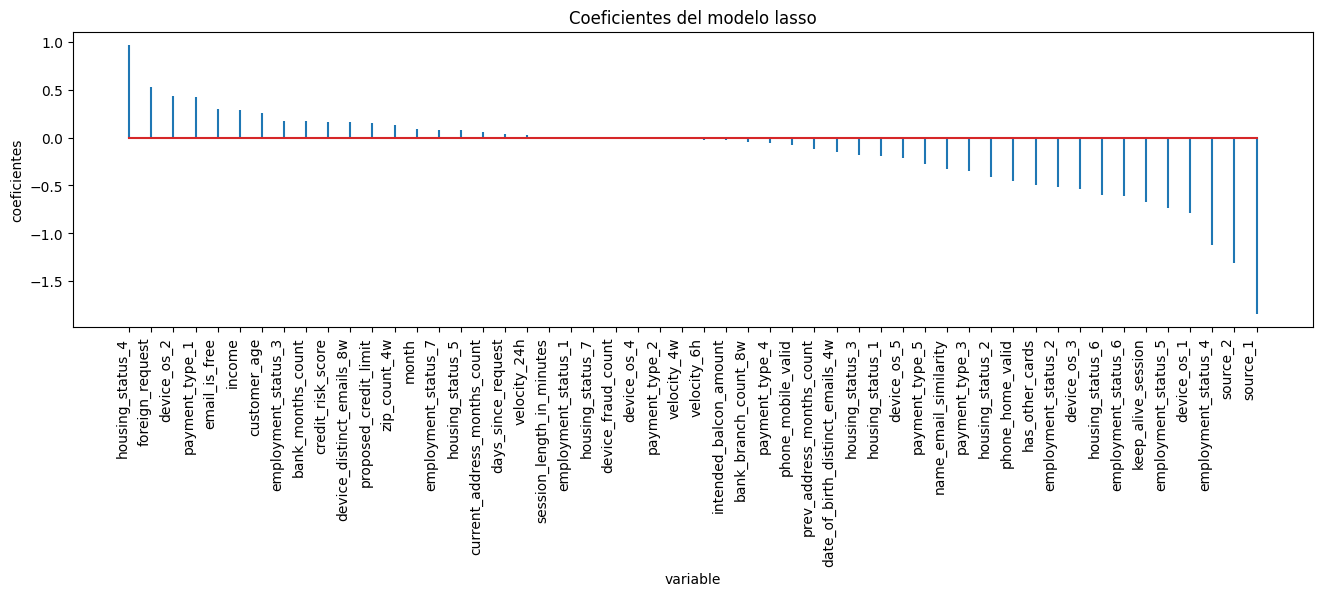

In [24]:
# Coeficientes del modelo
df_coeficientes_lasso = pd.DataFrame(
                        {'predictor': x_train.columns,
                         'coef': sel_lasso.estimator_.coef_.flatten()}
                  )

df_coeficientes_lasso = df_coeficientes_lasso.sort_values('coef', ascending=False)

fig, ax = plt.subplots(figsize=(16, 3.84))
ax.stem(df_coeficientes_lasso.predictor, df_coeficientes_lasso.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo lasso');


In [25]:
# Selecciono las variables
x_train_selected = x_train[selected_feat_lasso]
x_test_selected = x_test[selected_feat_lasso]

x_train_selected.shape

(800000, 35)

### Guardado en csv

In [20]:
write_csv(x_train_selected, 'data/processed/x_train_selected.csv')
write_csv(y_train, 'data/processed/y_train.csv')

write_csv(x_test_selected, 'data/processed/x_test_selected.csv')
write_csv(y_test, 'data/processed/y_test.csv')